In [1]:
#DEPENDENCIES

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

from keras.utils import to_categorical

#add company choice here
#add date choice here
url = "https://www.quandl.com/api/v3/datasets/WIKI/AMZN.json?oldest_available_date&newest_available_date&collapse=daily&api_key=e_WTsnJKsmnSoxEyY19D"
api_key = "e_WTsnJKsmnSoxEyY19D"

response = requests.get(url )
data = response.json()
print(json.dumps(data, indent=4, sort_keys=True))
#pprint(data)

#MAKE DATAFRAMES

date = []
open_ = []
high = []
low = []
close = []
volume = []

daily_difference = []
weekly_difference = []
monthly_difference = []
yearly_difference = []


for pr in data["dataset"]["data"]:
    date.append(pr[0])
    open_.append(pr[1])
    high.append(pr[2])
    low.append(pr[3])
    close.append(pr[4])
    volume.append(pr[5])

#reverse the lists so they are in ascending order
date = list(reversed(date))
open_= list(reversed(open_))
high = list(reversed(high))
low = list(reversed(low))
close = list(reversed(close))
volume = list(reversed(volume))
    
stk_file = {"date": date, "open": open_, "high": high, "low": low, "close": close, "volume": volume}

stk_file = pd.DataFrame(stk_file)


#CALCULATE PRICE DIFFERENCES********************************************
monthly_difference.append(0)

for i in range(1, len(date), 1):
    monthdiff=close[i]-open_[i-1]
    monthly_difference.append(monthdiff)

#make a new dataframe for the analysis by month; add column for monthly difference
stk_file_month = stk_file


#MAKE COLUMN FOR CATEGORICAL DATA: MONTHLY DIFFERENCE UP/DOWN
stk_file_month['monthly_difference'] = monthly_difference
upordown=[]
for val in monthly_difference:
    if val >=0:
        upordown.append(1)
    elif val <0:
        upordown.append(-1)
        
stk_file_month['upordown']=upordown
        
stk_file_month.head()

#make monthly difference column
stk_file_month['monthly_difference'] = monthly_difference

stk_file_month.head()



#############################DEEP LEARNING##############################################

#stk_file_month['date'] = stk_file_month['date'].astype(float)
#pd.to_numeric(stk_file_month['date'], errors='coerce')

#convert dates to float
datelist = stk_file_month['date']
for i in range(len(datelist)):
    dt = datelist[i]
    date = dt.split()[0].replace('-','')
    fl = float(date)
    datelist[i] = fl

#MODEL
X = stk_file_month["date"].values.reshape(-1, 1)
y = stk_file_month["upordown"].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=1))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=0)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


Using TensorFlow backend.


{
    "dataset": {
        "collapse": "daily",
        "column_index": null,
        "column_names": [
            "Date",
            "Open",
            "High",
            "Low",
            "Close",
            "Volume",
            "Ex-Dividend",
            "Split Ratio",
            "Adj. Open",
            "Adj. High",
            "Adj. Low",
            "Adj. Close",
            "Adj. Volume"
        ],
        "data": [
            [
                "2018-03-27",
                1572.4,
                1575.96,
                1482.32,
                1497.05,
                6793279.0,
                0.0,
                1.0,
                1572.4,
                1575.96,
                1482.32,
                1497.05,
                6793279.0
            ],
            [
                "2018-03-26",
                1530.0,
                1556.99,
                1499.25,
                1555.86,
                5547618.0,
                0.0,
                1.0,
 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/100
 - 1s - loss: 0.2565 - acc: 1.0000
Epoch 2/100
 - 0s - loss: 0.0779 - acc: 1.0000
Epoch 3/100
 - 0s - loss: 0.0272 - acc: 1.0000
Epoch 4/100
 - 0s - loss: 0.0113 - acc: 1.0000
Epoch 5/100
 - 0s - loss: 0.0057 - acc: 1.0000
Epoch 6/100
 - 0s - loss: 0.0034 - acc: 1.0000
Epoch 7/100
 - 0s - loss: 0.0022 - acc: 1.0000
Epoch 8/100
 - 0s - loss: 0.0015 - acc: 1.0000
Epoch 9/100
 - 0s - loss: 0.0011 - acc: 1.0000
Epoch 10/100
 - 0s - loss: 8.3089e-04 - acc: 1.0000
Epoch 11/100
 - 0s - loss: 6.4522e-04 - acc: 1.0000
Epoch 12/100
 - 0s - loss: 5.1221e-04 - acc: 1.0000
Epoch 13/100
 - 0s - loss: 4.1420e-04 - acc: 1.0000
Epoch 14/100
 - 0s - loss: 3.3988e-04 - acc: 1.0000
Epoch 15/100
 - 0s - loss: 2.8260e-04 - acc: 1.0000
Epoch 16/100
 - 0s - loss: 2.3746e-04 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 2.0150e-04 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 1.7241e-04 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 1.4860e-04 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 1.2888e-04 - acc: 1.0000
Epoch

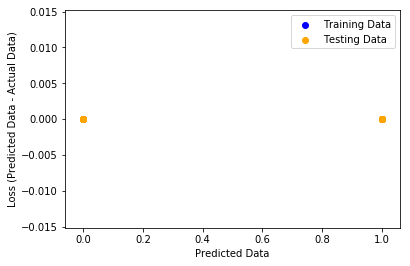

In [2]:
plt.scatter(deep_model.predict(X_train_scaled), deep_model.predict(X_train_scaled) - y_train_categorical, c="blue", label="Training Data")
plt.scatter(deep_model.predict(X_test_scaled), deep_model.predict(X_test_scaled) - y_test_categorical, c="orange", label="Testing Data")
plt.legend()
plt.xlabel("Predicted Data")
plt.ylabel("Loss (Predicted Data - Actual Data)")
plt.savefig("deeplearning.jpg")